## **Data Pre-processing**

## **1.Importing Required Libraries**

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import keras
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

## **2.Read the dataset**

In [181]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='xRWD9RSmuoy1Udx1IN1_oMkO62-_NWxYkNW550kBcVhm',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'webphishingdetection-donotdelete-pr-78vgx4mqjw4fsp'
object_key = 'dataset_website.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ds = pd.read_csv(body)
ds.head()


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [182]:
ds.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


## **3.Handling null values**

In [183]:
ds.shape

(11055, 32)

In [184]:
ds.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [185]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

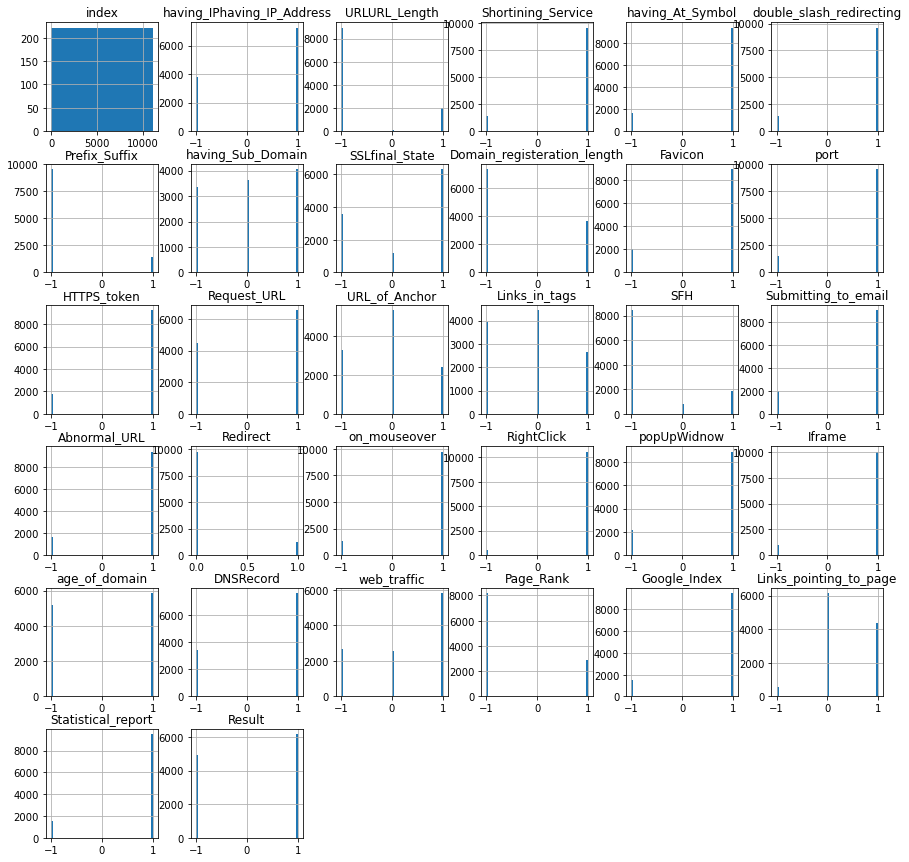

In [186]:
ds.hist(bins = 50,figsize = (15,15))
plt.show()

In [187]:
ds.isnull().any()

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

In [188]:
ds.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **4.Splitting the Data**

In [189]:
y = ds['Result']
x = ds.drop('Result',axis=1)
x.shape, y.shape

((11055, 31), (11055,))

In [190]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8844, 31), (8844,), (2211, 31), (2211,))

### **5.ML Model Training**

In [191]:
Model=[]
accuracy=[]
f1_score=[]
recall=[]
precision=[]
def Result(model,a,b,c,d):
  Model.append(model)
  accuracy.append(round(a,3))
  f1_score.append(round(b,3))
  recall.append(round(c,3))
  precision.append(round(d,3))

In [192]:
x_train

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
5033,5034,1,-1,1,1,1,1,-1,1,-1,...,1,1,1,1,-1,1,1,1,1,1
10307,10308,1,1,1,-1,1,-1,0,0,-1,...,1,-1,1,1,1,0,1,1,0,1
7563,7564,-1,-1,1,1,1,-1,0,0,1,...,1,1,1,-1,1,-1,-1,1,1,-1
5911,5912,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,1,-1,-1,1,0,1
9823,9824,1,-1,1,1,1,1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,4860,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,-1,-1,-1,1,1,1
3264,3265,1,-1,1,1,1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,-1,1,1
9845,9846,-1,1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,0,1,1,1,1
10799,10800,-1,-1,1,1,1,-1,-1,0,-1,...,1,1,1,1,1,0,-1,1,1,1


### **Logistic Regression**



In [193]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [194]:
y_test_lr = lr.predict(x_test)
y_train_lr = lr.predict(x_train)

In [195]:
acc_train_lr = metrics.accuracy_score(y_train,y_train_lr) *100
acc_test_lr = metrics.accuracy_score(y_test,y_test_lr)*100
print("Accuracy on training Data: {:.2f}".format(acc_train_lr))
print("Accuracy on test Data: {:.2f}".format(acc_test_lr))
print()
f1_score_train_lr = metrics.f1_score(y_train,y_train_lr) *100
f1_score_test_lr = metrics.f1_score(y_test,y_test_lr)*100
print("Accuracy on training Data: {:.2f}".format(f1_score_train_lr))
print("Accuracy on test Data: {:.2f}".format(f1_score_test_lr))
print()
recall_score_train_lr = metrics.recall_score(y_train,y_train_lr) *100
recall_score_test_lr = metrics.recall_score(y_test,y_test_lr)*100
print("Accuracy on training Data: {:.2f}".format(recall_score_train_lr))
print("Accuracy on test Data: {:.2f}".format(recall_score_test_lr))
print()
precision_score_train_lr = metrics.recall_score(y_train,y_train_lr) *100
precision_score_test_lr = metrics.recall_score(y_test,y_test_lr)*100
print("Accuracy on training Data: {:.2f}".format(precision_score_train_lr))
print("Accuracy on test Data: {:.2f}".format(precision_score_test_lr))
print()



Accuracy on training Data: 92.73
Accuracy on test Data: 91.77

Accuracy on training Data: 93.58
Accuracy on test Data: 92.53

Accuracy on training Data: 94.50
Accuracy on test Data: 94.15

Accuracy on training Data: 94.50
Accuracy on test Data: 94.15



In [196]:
print(metrics.classification_report(y_test,y_test_lr))

              precision    recall  f1-score   support

          -1       0.93      0.89      0.91      1014
           1       0.91      0.94      0.93      1197

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [197]:
Result('Logistic Regression',acc_test_lr,f1_score_test_lr,
             recall_score_train_lr,precision_score_train_lr)

### **Random Forest**

In [198]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [199]:
y_test_rf = rf.predict(x_test)
y_train_rf = rf.predict(x_train)

In [200]:
!pip install ibm_watson_machine_learning

In [201]:
from ibm_watson_machine_learning import APIClient
wml_client = APIClient(wml_credentials)
wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                    "apikey":"H_eQnWI4923bdKM63m1wH9G07eo-uRpUYs9b7FqNPCVF"
                    }
client = APIClient(wml_credentials)

In [202]:
def guid_from_space_name(client, space_name):
        space = client.spaces.get_details()
        #print(space)
        return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [203]:
space_uid = guid_from_space_name(client,'Model1')
print("Space UID = " + space_uid)

Space UID = ea9cf942-7b83-42d9-abca-3d52afaa9d35


In [204]:
client.set.default_space(space_uid)

'SUCCESS'

In [205]:
!yum install gcc  xz python3 gcc-c++ gcc-gfortran freetype2-devel libpng-devel zeromq zeromq-devel lapack blas python3-devel

/usr/bin/sh: yum: command not found


In [206]:
client.software_specifications.list(limit = 200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [207]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [208]:
model_details = client.repository.store_model(model=rf,meta_props={ client.repository.ModelMetaNames.NAME:"dataset_website", client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0", client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid })
                                              
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [209]:
model_id

'df619b9d-0d6a-410a-a00c-287b8bc855e1'

In [210]:
acc_train_rf = metrics.accuracy_score(y_train,y_train_rf)*100
acc_test_rf = metrics.accuracy_score(y_test,y_test_rf)*100
print("Accuracy on training Data: {:.2f}".format(acc_train_rf))
print("Accuracy on test Data: {:.2f}".format(acc_test_rf))
print()
f1_score_train_rf = metrics.f1_score(y_train,y_train_rf) *100
f1_score_test_rf = metrics.f1_score(y_test,y_test_rf)*100
print("Accuracy on training Data: {:.2f}".format(f1_score_train_rf))
print("Accuracy on test Data: {:.2f}".format(f1_score_test_rf))
print()
recall_score_train_rf = metrics.recall_score(y_train,y_train_rf) *100
recall_score_test_rf = metrics.recall_score(y_test,y_test_rf)*100
print("Accuracy on training Data: {:.2f}".format(recall_score_train_rf))
print("Accuracy on test Data: {:.2f}".format(recall_score_test_rf))
print()
precision_score_train_rf = metrics.recall_score(y_train,y_train_rf) *100
precision_score_test_rf= metrics.recall_score(y_test,y_test_rf)*100
print("Accuracy on training Data: {:.2f}".format(precision_score_train_rf))
print("Accuracy on test Data: {:.2f}".format(precision_score_test_rf))
print()


Accuracy on training Data: 100.00
Accuracy on test Data: 96.65

Accuracy on training Data: 100.00
Accuracy on test Data: 96.94

Accuracy on training Data: 100.00
Accuracy on test Data: 97.91

Accuracy on training Data: 100.00
Accuracy on test Data: 97.91



In [211]:
print(metrics.classification_report(y_test,y_test_rf))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1014
           1       0.96      0.98      0.97      1197

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



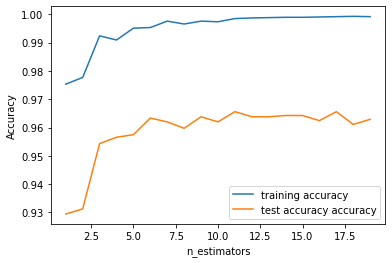

In [212]:
training_accuracy=[]
test_accuracy=[]
depth=range(1,20)
for n in depth:
  rf_test=RandomForestClassifier(n_estimators=n)
  rf_test.fit(x_train,y_train)
  training_accuracy.append(rf_test.score(x_train,y_train))
  test_accuracy.append(rf_test.score(x_test,y_test))
plt.figure(figsize=None)
plt.plot(depth,training_accuracy,label="training accuracy")
plt.plot(depth,test_accuracy,label="test accuracy accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend();

In [213]:
Result('Random Forest',acc_test_rf,f1_score_test_rf,
             recall_score_train_rf,precision_score_train_rf)

### **Decision Tree classifier**

In [214]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [215]:
y_test_tree= tree.predict(x_test)
y_train_tree = tree.predict(x_train)

In [216]:
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)*100
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)*100
print("Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()
f1_score_train_tree = metrics.f1_score(y_train,y_train_tree) *100
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)*100
print("Accuracy on training Data: {:.2f}".format(f1_score_train_tree))
print("Accuracy on test Data: {:.2f}".format(f1_score_test_tree))
print()
recall_score_train_tree = metrics.recall_score(y_train,y_train_tree) *100
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)*100
print("Accuracy on training Data: {:.2f}".format(recall_score_train_tree))
print("Accuracy on test Data: {:.2f}".format(recall_score_test_tree))
print()
precision_score_train_tree = metrics.recall_score(y_train,y_train_tree) *100
precision_score_test_tree= metrics.recall_score(y_test,y_test_tree)*100
print("Accuracy on training Data: {:.2f}".format(precision_score_train_tree))
print("Accuracy on test Data: {:.2f}".format(precision_score_test_tree))
print()


Accuracy on training Data: 100.000
Accuracy on test Data: 94.889

Accuracy on training Data: 100.00
Accuracy on test Data: 95.30

Accuracy on training Data: 100.00
Accuracy on test Data: 95.66

Accuracy on training Data: 100.00
Accuracy on test Data: 95.66



In [217]:
print(metrics.classification_report(y_test,y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.94      0.94      1014
           1       0.95      0.96      0.95      1197

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [218]:
Result('Decision tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

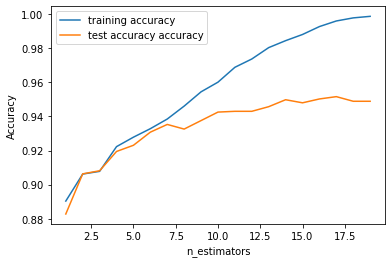

In [219]:
training_accuracy=[]
test_accuracy=[]
depth=range(1,20)
for n in depth:
  tree_test=DecisionTreeClassifier(max_depth=n)
  tree_test.fit(x_train,y_train)
  training_accuracy.append(tree_test.score(x_train,y_train))
  test_accuracy.append(tree_test.score(x_test,y_test))
plt.figure(figsize=None)
plt.plot(depth,training_accuracy,label="training accuracy")
plt.plot(depth,test_accuracy,label="test accuracy accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend();

### **Gradient Boosting Classifier**

In [220]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

gbc.fit(x_train,y_train)


GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [221]:
y_test_gbc = gbc.predict(x_test)
y_train_gbc = gbc.predict(x_train)

In [222]:
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc) *100
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)*100
print("Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()
print()
f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc) *100
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)*100
print("Accuracy on training Data: {:.2f}".format(f1_score_train_gbc))
print("Accuracy on test Data: {:.2f}".format(f1_score_test_gbc))
print()
recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc) *100
recall_score_test_gbc = metrics.recall_score(y_test,y_test_gbc)*100
print("Accuracy on training Data: {:.2f}".format(recall_score_train_gbc))
print("Accuracy on test Data: {:.2f}".format(recall_score_test_gbc))
print()
precision_score_train_gbc = metrics.recall_score(y_train,y_train_gbc) *100
precision_score_test_gbc= metrics.recall_score(y_test,y_test_gbc)*100
print("Accuracy on training Data: {:.2f}".format(precision_score_train_gbc))
print("Accuracy on test Data: {:.2f}".format(precision_score_test_gbc))
print()

Accuracy on training Data: 99.830
Accuracy on test Data: 95.794


Accuracy on training Data: 99.85
Accuracy on test Data: 96.13

Accuracy on training Data: 99.84
Accuracy on test Data: 96.49

Accuracy on training Data: 99.84
Accuracy on test Data: 96.49



In [223]:
print(metrics.classification_report(y_test,y_test_gbc))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95      1014
           1       0.96      0.96      0.96      1197

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



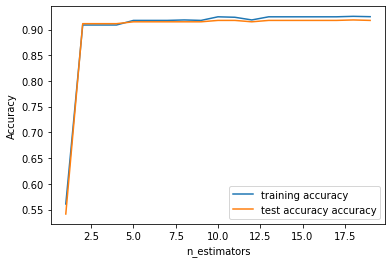

In [224]:
training_accuracy=[]
test_accuracy=[]
depth=range(1,20)
for n in depth:
  gbc_test=GradientBoostingClassifier(n_estimators=n)
  gbc_test.fit(x_train,y_train)
  training_accuracy.append(gbc_test.score(x_train,y_train))
  test_accuracy.append(gbc_test.score(x_test,y_test))
plt.figure(figsize=None)
plt.plot(depth,training_accuracy,label="training accuracy")
plt.plot(depth,test_accuracy,label="test accuracy accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend();

In [225]:
Result('GradientBoostingClassifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

# **6.Comparison of models**

In [226]:
result =pd.DataFrame({'ML Model':Model,
                      'Accuracy':accuracy,
                      'f1_score':f1_score,
                      'Recall':recall,
                      'Precision':precision,})
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,91.768,92.529,94.496,94.496
1,Random Forest,96.653,96.940,100.000,100.000
2,Decision tree,94.889,95.298,100.000,100.000
3,GradientBoostingClassifier,95.794,96.130,99.839,99.839


In [227]:
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,96.653,96.940,100.000,100.000
1,GradientBoostingClassifier,95.794,96.130,99.839,99.839
2,Decision tree,94.889,95.298,100.000,100.000
3,Logistic Regression,91.768,92.529,94.496,94.496


In [228]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [229]:
pickle.dump(rf,open("Phishing_Website.pkl", "wb"))

In [230]:
file = open("Phishing_Website.pkl", "rb")

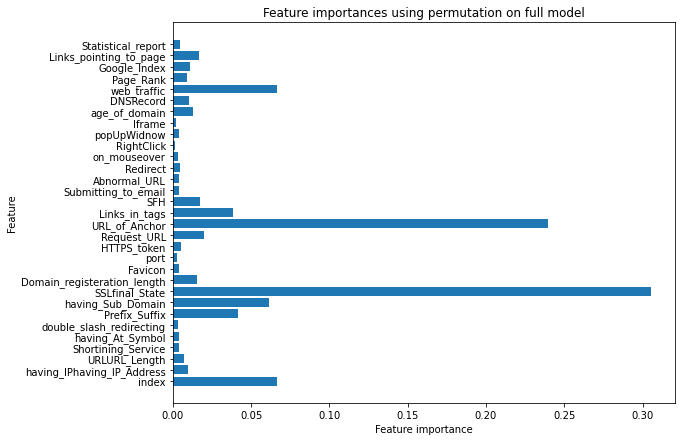

In [231]:
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [232]:
pickle.load(file)

RandomForestClassifier()